# Project Embrace Device Inventory Visualization

In [156]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from plotly import graph_objs as go
from plotly.subplots import make_subplots

In [157]:
init_notebook_mode(connected=True)
cf.go_offline()

In [158]:
pei = pd.read_csv('pe_inventory.csv')
pei.reset_index()
pei.info()
pei.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 11 columns):
id                                 284 non-null int64
type                               284 non-null object
condition                          284 non-null object
donated_to_recipient               284 non-null bool
campaign_id                        284 non-null int64
donor_id                           284 non-null int64
storage_area_id                    284 non-null int64
date_donated_to_recipient          78 non-null object
processed                          284 non-null bool
unique_information                 284 non-null object
date_donated_to_project_embrace    284 non-null object
dtypes: bool(2), int64(4), object(5)
memory usage: 20.6+ KB


,id,type,condition,donated_to_recipient,campaign_id,donor_id,storage_area_id,date_donated_to_recipient,processed,unique_information,date_donated_to_project_embrace
0,1,walker,A,False,1,3,1,NaN,False,None,2019-02-23
1,43,crutch,A,True,2,1,1,2019-05-15,True,None,2019-02-23
2,6,medical boot,A,False,1,1,1,NaN,False,None,2019-02-23
3,71,walker,A,True,2,1,1,2019-05-15,True,None,2019-02-23
4,8,walker,A,False,1,1,1,NaN,True,None,2019-02-23


#### I would only like to focus on a few of the variables in this data. The following are the most essential to understand

In [159]:
pei = pei.filter(['type',
                  'condition',
                  'campaign_id',
                  'date_donated_to_recipient',
                  'date_donated_to_project_embrace',
                  'donated_to_recipient'],axis=1)

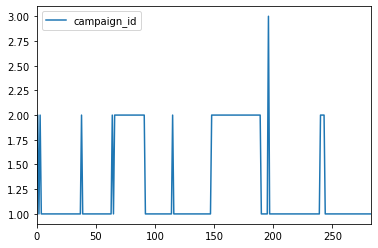

In [160]:
pei.plot()

In [161]:
# This cell is only to test the offline capabilites of iplot()
pei.iplot()

In [162]:
pei.groupby('condition')['type'].count().iplot(kind='bar',color='#990000')

In [163]:
pei.groupby('type')['condition'].count().iplot(kind='bar',color='#990000')

In [164]:
pei.groupby('date_donated_to_project_embrace')['condition'].count().iplot(kind='line',color='#990000')

In [165]:
pei.groupby('donated_to_recipient')['condition'].count().iplot(kind='bar',color='#990000')

In [166]:
pei_on_hand = pei[pei['donated_to_recipient'] == False]
pei_on_hand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 283
Data columns (total 6 columns):
type                               206 non-null object
condition                          206 non-null object
campaign_id                        206 non-null int64
date_donated_to_recipient          0 non-null object
date_donated_to_project_embrace    206 non-null object
donated_to_recipient               206 non-null bool
dtypes: bool(1), int64(1), object(4)
memory usage: 9.9+ KB


In [167]:
pei_on_hand.groupby('type')['condition'].count().iplot(kind='bar',color='#990000')

## This will be an excellent use of plotly for my organization. We have wanted to create a public facing dashboard for inquiring individuals can see our current inventory count and request our services based on what they see here. 

In [168]:
pei_ready_to_distribute=pei_on_hand[pei_on_hand['condition']=='A']
pei_ready_to_distribute=pd.DataFrame(pei_ready_to_distribute.groupby('type')['condition'].count())
pei_ready_to_distribute=pei_ready_to_distribute.reset_index()
pei_ready_to_distribute.iplot(kind='pie',labels='type',values='condition',pull=.1,hole=.2,
          colorscale='reds',textposition='outside',textinfo='value')